In [113]:
#dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import numpy as np
from config import consumer_key,consumer_secret,access_token,access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()






In [114]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [115]:
#News Stations
news_stations = ('@BBCWorld','@CBSNews','@CNN','@FoxNews','@nytimes')



#Variable for holding sentiments
sentiments = []

# Loop through each user
for station in news_stations:
    count = 1
    # Loop through 5 pages of tweets (total 100 tweets)
#    for page in range(5):
    for page in tweepy.Cursor(api.user_timeline,id = station).pages(5):

        # Get all tweets from home feed
#        public_tweets = api.user_timeline(station,page = page)
        public_tweets = page        
        # Loop through all tweets
        for tweet in public_tweets:
            tweet = tweet._json
            #print(tweet._json)
            #get date and tweet text
            date = tweet['created_at']
            tweet_text = tweet['text']

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # create DataFrame
            sentiments.append({'Date':date,
                               'Station': station,
                               'Tweets':tweet_text,
                               'Compound':compound,
                               'Positive':pos,
                               'Neutral':neu,
                               'Negative':neg,
                               'Tweet_Counter':count})
            count = count + 1
            
       
    


In [116]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.to_csv('stations.CSV')
sentiments_pd


,Compound,Date,Negative,Neutral,Positive,Station,Tweet_Counter,Tweets
0,0.0000,Sat Mar 24 06:53:52 +0000 2018,0.000,1.000,0.000,@BBCWorld,1,Flying firsts: Aviation milestones throughout ...
1,0.0000,Sat Mar 24 05:18:00 +0000 2018,0.000,1.000,0.000,@BBCWorld,2,French police 'hero' dies of wounds https://t....
2,-0.4019,Sat Mar 24 05:02:57 +0000 2018,0.278,0.722,0.000,@BBCWorld,3,Spain Catalonia: Clashes after separatist lead...
3,-0.3818,Sat Mar 24 03:37:39 +0000 2018,0.342,0.658,0.000,@BBCWorld,4,Skripal 'regretted being double agent' https:/...
4,0.0000,Sat Mar 24 02:17:19 +0000 2018,0.000,1.000,0.000,@BBCWorld,5,The woman who brought skull watches back to li...
5,0.0000,Sat Mar 24 02:01:47 +0000 2018,0.000,1.000,0.000,@BBCWorld,6,Florida school shooting: Pennsylvania students...
6,0.0000,Sat Mar 24 01:22:13 +0000 2018,0.000,1.000,0.000,@BBCWorld,7,DR Congo to shun its own donor conference in G...
7,0.0000,Sat Mar 24 00:42:53 +0000 2018,0.000,1.000,0.000,@BBCWorld,8,A day in the life of India's 'tuberculosis war...
8,0.0000,Sat Mar 24 00:39:01 +0000 2018,0.000,1.000,0.000,@BBCWorld,9,The evolution of UK-Australia travel into a si...
9,-0.5994,Fri Mar 23 23:33:03 +0000 2018,0.302,0.698,0.000,@BBCWorld,10,Hamelin Bay: Nearly 150 beached whales die in ...


In [122]:

#Dataframe filter for each station
BBC_pd = sentiments_pd.loc[sentiments_pd['Station'] == '@BBCWorld']
CBS_pd = sentiments_pd.loc[sentiments_pd['Station'] == '@CBSNews']
CNN_pd = sentiments_pd.loc[sentiments_pd['Station'] == '@CNN']
FOX_pd = sentiments_pd.loc[sentiments_pd['Station'] == '@FoxNews']
NYT_pd = sentiments_pd.loc[sentiments_pd['Station'] == '@nytimes']
BBC_pd

,Compound,Date,Negative,Neutral,Positive,Station,Tweet_Counter,Tweets
0,0.0000,Sat Mar 24 06:53:52 +0000 2018,0.000,1.000,0.000,@BBCWorld,1,Flying firsts: Aviation milestones throughout ...
1,0.0000,Sat Mar 24 05:18:00 +0000 2018,0.000,1.000,0.000,@BBCWorld,2,French police 'hero' dies of wounds https://t....
2,-0.4019,Sat Mar 24 05:02:57 +0000 2018,0.278,0.722,0.000,@BBCWorld,3,Spain Catalonia: Clashes after separatist lead...
3,-0.3818,Sat Mar 24 03:37:39 +0000 2018,0.342,0.658,0.000,@BBCWorld,4,Skripal 'regretted being double agent' https:/...
4,0.0000,Sat Mar 24 02:17:19 +0000 2018,0.000,1.000,0.000,@BBCWorld,5,The woman who brought skull watches back to li...
5,0.0000,Sat Mar 24 02:01:47 +0000 2018,0.000,1.000,0.000,@BBCWorld,6,Florida school shooting: Pennsylvania students...
6,0.0000,Sat Mar 24 01:22:13 +0000 2018,0.000,1.000,0.000,@BBCWorld,7,DR Congo to shun its own donor conference in G...
7,0.0000,Sat Mar 24 00:42:53 +0000 2018,0.000,1.000,0.000,@BBCWorld,8,A day in the life of India's 'tuberculosis war...
8,0.0000,Sat Mar 24 00:39:01 +0000 2018,0.000,1.000,0.000,@BBCWorld,9,The evolution of UK-Australia travel into a si...
9,-0.5994,Fri Mar 23 23:33:03 +0000 2018,0.302,0.698,0.000,@BBCWorld,10,Hamelin Bay: Nearly 150 beached whales die in ...


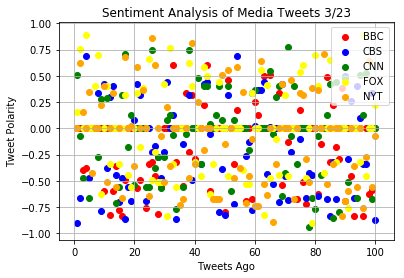

In [140]:
#Scatterplot
#Scatter different colors

a = plt.scatter(BBC_pd['Tweet_Counter'],BBC_pd['Compound'], c = 'red',label = 'BBC')
b = plt.scatter(CBS_pd['Tweet_Counter'],CBS_pd['Compound'], c = 'blue', label = 'CBS')
c = plt.scatter(CNN_pd['Tweet_Counter'],CNN_pd['Compound'], c = 'green', label = 'CNN')
d = plt.scatter(FOX_pd['Tweet_Counter'],FOX_pd['Compound'], c = 'yellow', label = 'FOX')
e = plt.scatter(NYT_pd['Tweet_Counter'],NYT_pd['Compound'], c = 'orange', label = 'NYT')

legend =[a,b,c,d,e]
legend_names = ['BBC','CBS','CNN','FOX','NYT']


#Other scatterplot items
plt.grid(True)
plt.legend(legend,legend_names)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets 3/23")
plt.savefig('TwitterScatterPlot.png')
plt.show()


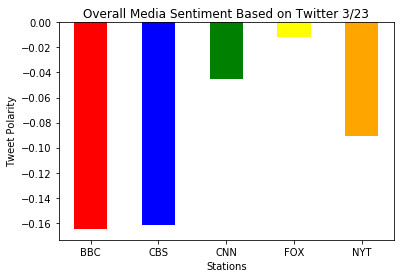

In [141]:
#Barplot
#Overall sentiment - mean compound value for each station
BBC = BBC_pd['Compound'].mean()
CBS = CBS_pd['Compound'].mean()
CNN = CNN_pd['Compound'].mean()
FOX = FOX_pd['Compound'].mean()
NYT = NYT_pd['Compound'].mean()
colors = ['red','blue','green','yellow','orange']

station_value = [BBC,CBS,CNN,FOX,NYT]
#position
station_len = np.arange(5)
station_names = ['BBC','CBS','CNN','FOX','NYT']
width = 0.5

plt.bar(station_len, station_value, max(station_value) + 0.5, color = colors)

plt.xticks(station_len,station_names)
plt.title("Overall Media Sentiment Based on Twitter 3/23")
plt.xlabel("Stations")
plt.ylabel("Tweet Polarity")
plt.savefig('TwitterBarPlot.png')
plt.show()


In [137]:
print(BBC)
print(CBS)
print(CNN)
print(FOX)
print(NYT)

-0.16529000000000005
-0.16159800000000005
-0.045325000000000004
-0.011947000000000001
-0.09036399999999997
